# 1. Import dependencies

# 2. EDA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
target = 'salary_in_usd'
features = list(set(df.columns) - set([target]))
# Get categorical features and numerical features
cat_features = [col for col in features if df[col].dtype == object]
numeric_features = list(set(features) - set(cat_features))

In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


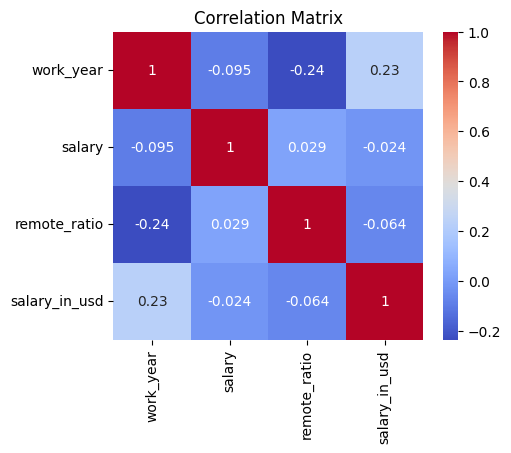

In [5]:
# Look at correlation matrix for numeric features
correlation_matrix = df[numeric_features+[target]].corr()
# Plotting the Correlation Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'salary_in_usd')

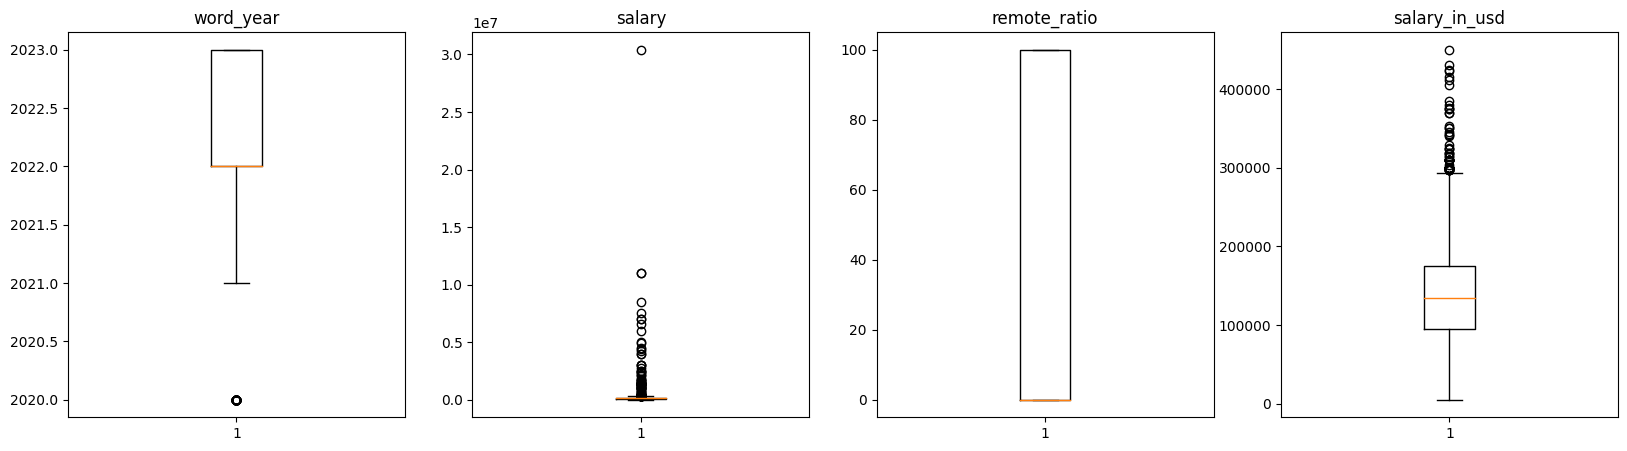

In [6]:
# Take a closer look at 'salary' since it should have a high correlation with our target 'salary_in_usd'. The
# fact that the above correlation matrix doesn't indicate this implies anomalies.
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].boxplot(df['work_year'])
axes[0].set_title('word_year')

axes[1].boxplot(df['salary'])
axes[1].set_title('salary')

axes[2].boxplot(df['remote_ratio'])
axes[2].set_title('remote_ratio')

axes[3].boxplot(df['salary_in_usd'])
axes[3].set_title('salary_in_usd')

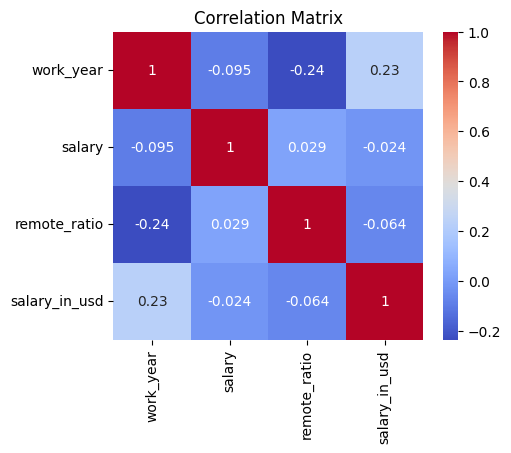

In [7]:
# Look at correlation matrix for numeric features
correlation_matrix = df[numeric_features + [target]].corr()
# Plotting the Correlation Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 2.1 Salary trend over time

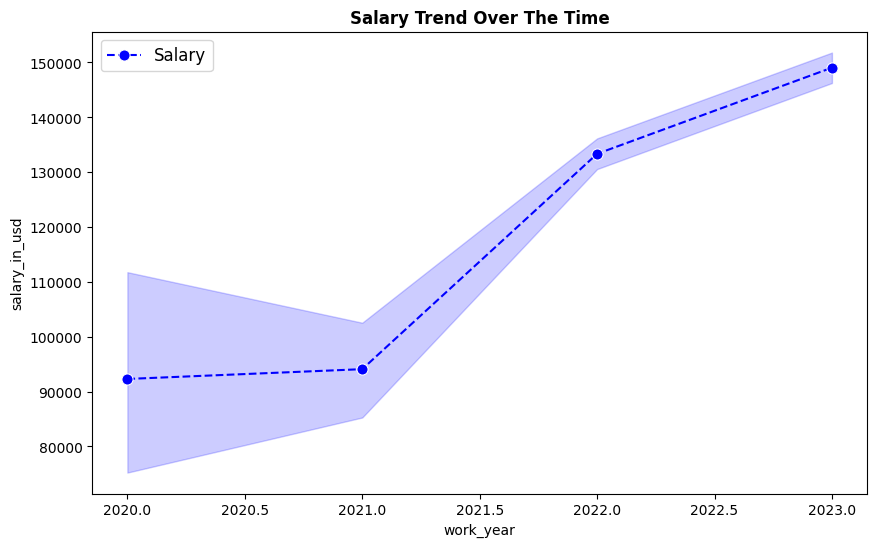

In [8]:
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')
# Customize the background color
plt.legend(['Salary'], loc='best', fontsize=12)
# Remove the grid lines
p.grid(False)
plt.show()

## 2.2 Average Salary (in USD) by experience level

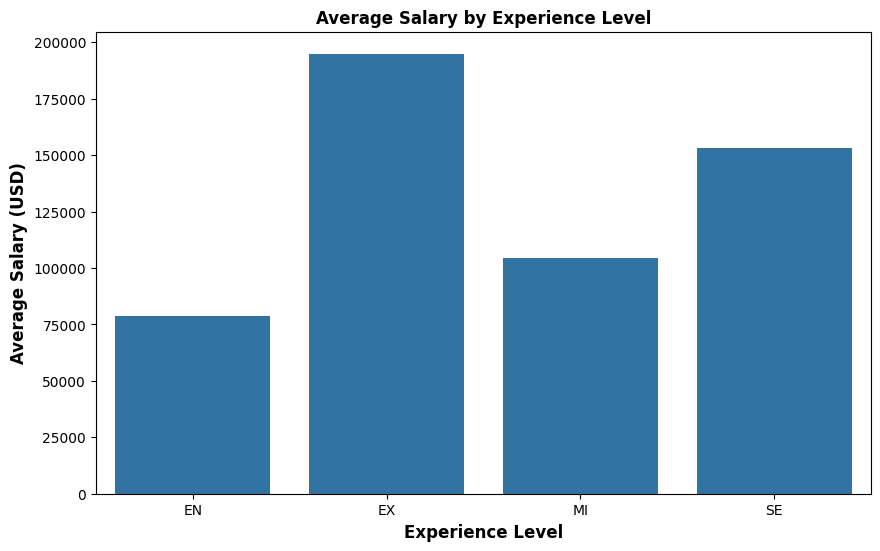

In [9]:
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values)
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.show()

## 2.3 Mean salary by employment type

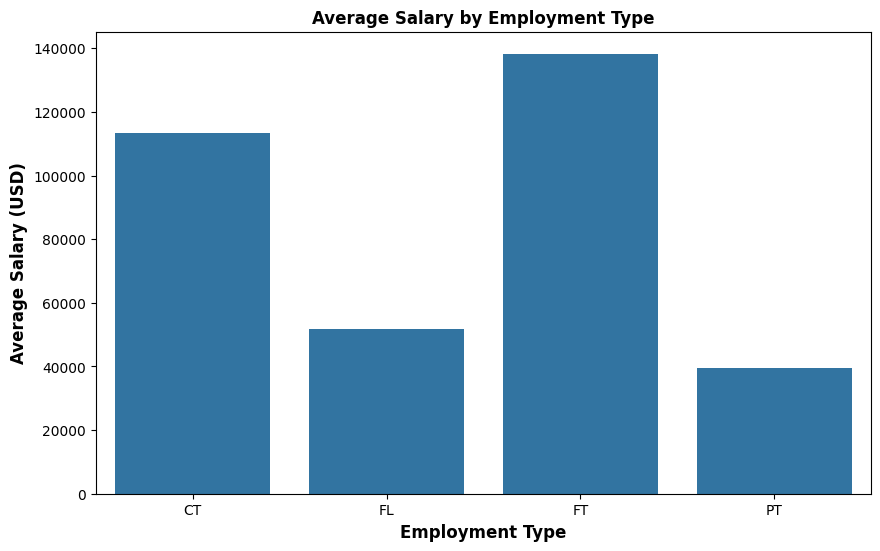

In [10]:
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(y = emp_salary.values, x = emp_salary.index)
plt.title('Average Salary by Employment Type', fontsize=12, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

plt.show()

## 2.4 Mean salary by company size

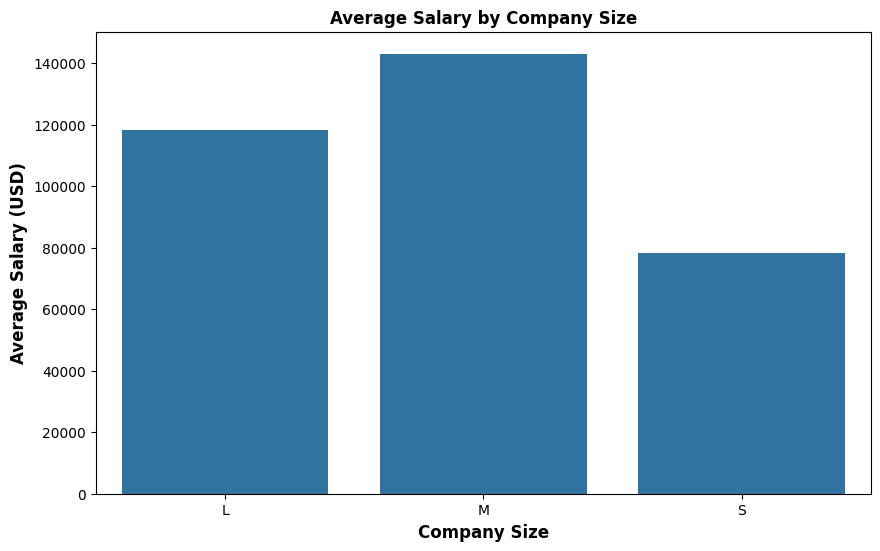

In [11]:
# Group data by 'company_size' and calculate the average salary for each size
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean()

# Plot the average salary by company size
plt.figure(figsize=(10, 6))
p = sns.barplot(x=company_size_salary.index, y=company_size_salary.values)
plt.title('Average Salary by Company Size', fontsize=12, fontweight='bold')
plt.xlabel('Company Size',fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.show()

## 2.5 Salary distribution 

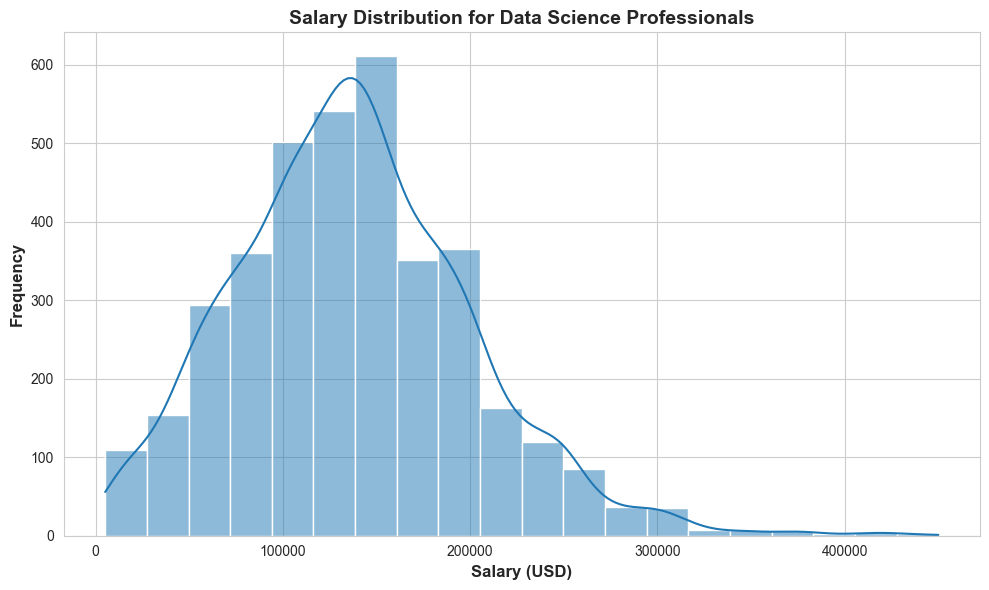

In [12]:
# Set a custom style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=20, ax=ax)

# Customize labels and title
ax.set_title('Salary Distribution for Data Science Professionals', fontsize=14, fontweight='bold')
ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False)
# Show the plot
plt.tight_layout()
plt.show()

## 2.6 Features cross: Mean salary by experience_level X employment_type

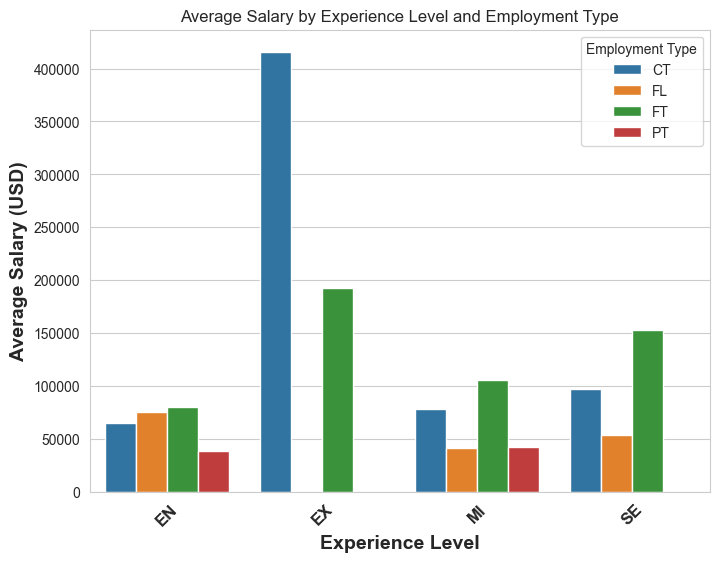

In [13]:
# Calculate average salary for each combination of experience level and employment type
grouped_by_result = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=grouped_by_result)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

# Increase legend font size and make it bold
legend = plt.legend(title='Employment Type')

# Show the plot
plt.show()


## 2.7 Features cross: Mean salary by experience_level X company_size

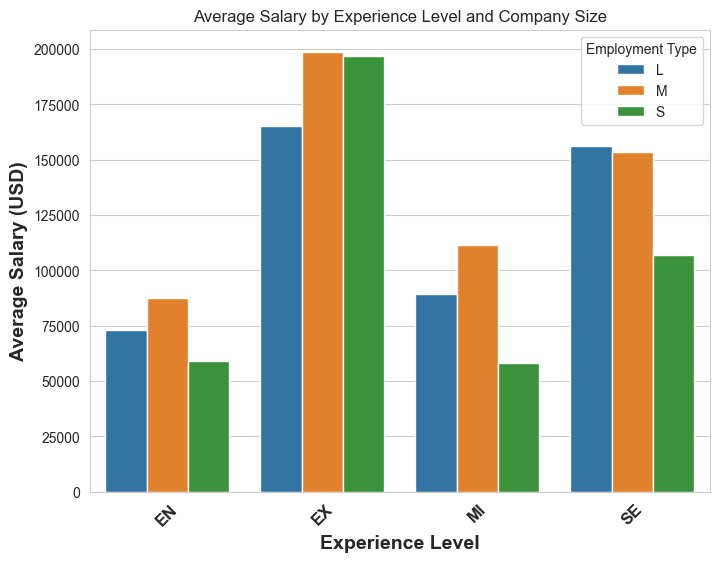

In [14]:
# Calculate average salary for each combination of experience level and employment type
grouped_by_result = df.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean().reset_index()

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='company_size', data=grouped_by_result)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Company Size')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

# Increase legend font size and make it bold
legend = plt.legend(title='Employment Type')

# Show the plot
plt.show()

## 2.8 Conclusion

1. Numerical variables have little linear correlation with salary. Only variable showing some linear
correlation is year. 

2. Categorical variables show the following trends:
    - Experience level: Experienced > Senior > Mid-Level, Entry-Level
    - Employment type: Full time > Contract > Freelance > Part time
    - Company size: Medium > Large > Small

3. Feature-crosses: 
    - Interestingly, crossing experience-level with employment type shows (experienced, contractor) as having highest salary
    - Also, crossing experience-level with company size shows that for experience and senior experience, the trend of M > L > S doesn't hold. 

* In the pre-processing phase, do the following:
    1. Drop 'salary' column since it is semantically too similar to 'salary_in_usd'.
    2. Convert the categorical variables with ordinal nature to have ordinal values. 
    3. Add synthetic features to increase complexity of model

# 3. Pre-processing

## 3.1 Basic Preprocessing (little feature engineering)

In [15]:
df_clone = df.copy()
target = 'salary_in_usd'
# Drop rows where target value is missing
df_clone = df_clone.dropna(subset=[target])

# Drop 'salary' column
if ('salary' in df_clone.columns):
    df_clone = df_clone.drop('salary', axis=1)
# Get features
features = list(set(df_clone.columns) - set([target]))
# Split data into train set and test set (note: by test set I mean to use for final evaluation, not validation)
total_samples = df_clone.shape[0]

df_clone_train = df_clone[0: int(total_samples * 0.8)]
train_set = df_clone_train[features + [target]] # Rearrange columns so target column is the last one
df_clone_test = df_clone[int(total_samples*0.8):]
test_set = df_clone_test[features + [target]]
print("Original dataset has {} rows".format(total_samples))
print("Train set has {} rows".format(train_set.shape[0]))
print("Test set has {} rows".format(test_set.shape[0]))


Original dataset has 3755 rows
Train set has 3004 rows
Test set has 751 rows


In [16]:
# Split the train set and test set in terms of X and y
X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

# Get categorical features and numerical features
cat_features = [col for col in features if X_train[col].dtype == object]
numeric_features = list(set(features) - set(cat_features))

print('Categorical features: {}'.format(cat_features))
print('Numerical features: {}'.format(numeric_features))

Categorical features: ['experience_level', 'company_size', 'employee_residence', 'employment_type', 'salary_currency', 'company_location', 'job_title']
Numerical features: ['work_year', 'remote_ratio']


In [17]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [18]:
# Use sklearn's Pipeline module to streamline the preprocessing steps
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

numeric_transformer = Pipeline(steps=[
    ('numeric_imputer', SimpleImputer(strategy='median')),
    ('standard_scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('numeric_transformer', numeric_transformer, numeric_features),
    ('cat_transformer', cat_transformer, cat_features)
])


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linear', LinearRegression())
])
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('forest', Ridge())
])

lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('forest', Lasso())
])
forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('forest', RandomForestRegressor())
])


from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def regression_cv_no_feat(x, y):
    models = [linear_model, ridge_model, lasso_model, forest_model]
    model_names = ["Linear Regression", 'Ridge', 'Lasso', 'Random Forest']

    r_score = []
    mse = []
    mae = []

    result = pd.DataFrame(columns=['Mean_R_square', 'Mean_RMSE', 'Mean_MAE'], index=model_names)

    for model in models:
        # R2 score
        scores = cross_val_score(model, x, y, cv=5, scoring='r2')
        r_score.append(scores.mean())

        # Mean Squared Error
        mse_scores = cross_val_score(model, x, y, cv=5, scoring=make_scorer(mean_squared_error))
        mse.append(np.sqrt(mse_scores).mean())  # Root Mean Squared Error

        # Mean Absolute Error
        mae_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_absolute_error')
        mae.append(-mae_scores.mean())  # Negate to get positive values

    result.Mean_R_square = r_score
    result.Mean_RMSE = mse
    result.Mean_MAE = mae

    return result.sort_values('Mean_R_square', ascending=False)
"""
models = [linear_model, ridge_model, lasso_model, forest_model]
model_names = ["Linear Regression", 'Ridge', 'Lasso', 'Random Forest']

r_score = []
mse = []
mae = []

result = pd.DataFrame(columns=['Mean_R_square', 'Mean_RMSE', 'Mean_MAE'], index=model_names)

for model in models:
    # R2 score
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    r_score.append(scores.mean())

    # Mean Squared Error
    mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
    mse.append(np.sqrt(mse_scores).mean())  # Root Mean Squared Error

    # Mean Absolute Error
    mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae.append(-mae_scores.mean())  # Negate to get positive values

result.Mean_R_square = r_score
result.Mean_RMSE = mse
result.Mean_MAE = mae

result.sort_values('Mean_R_square', ascending=False)
"""

'\nmodels = [linear_model, ridge_model, lasso_model, forest_model]\nmodel_names = ["Linear Regression", \'Ridge\', \'Lasso\', \'Random Forest\']\n\nr_score = []\nmse = []\nmae = []\n\nresult = pd.DataFrame(columns=[\'Mean_R_square\', \'Mean_RMSE\', \'Mean_MAE\'], index=model_names)\n\nfor model in models:\n    # R2 score\n    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=\'r2\')\n    r_score.append(scores.mean())\n\n    # Mean Squared Error\n    mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))\n    mse.append(np.sqrt(mse_scores).mean())  # Root Mean Squared Error\n\n    # Mean Absolute Error\n    mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=\'neg_mean_absolute_error\')\n    mae.append(-mae_scores.mean())  # Negate to get positive values\n\nresult.Mean_R_square = r_score\nresult.Mean_RMSE = mse\nresult.Mean_MAE = mae\n\nresult.sort_values(\'Mean_R_square\', ascending=False)\n'

## 3.2 Preprocessing with Feature engineering

In [19]:
df_feat = df.copy()

target = 'salary_in_usd'
# Drop rows where target value is missing
df_feat = df_feat.dropna(subset=[target])

# Drop 'salary' column
if ('salary' in df_feat.columns):
    df_feat = df_feat.drop('salary', axis=1)
# Get features
features = list(set(df_feat.columns) - set([target]))
# Split data into train set and test set (note: by test set I mean to use for final evaluation, not validation)
total_samples = df_feat.shape[0]

df_feat_train = df_feat[0: int(total_samples * 0.8)]
train_set = df_feat_train[features + [target]] # Rearrange columns so target column is the last one
df_feat_test = df_feat[int(total_samples*0.8):]
test_set = df_feat_test[features + [target]]
print("Original dataset has {} rows".format(total_samples))
print("Train set has {} rows".format(train_set.shape[0]))
print("Test set has {} rows".format(test_set.shape[0]))

Original dataset has 3755 rows
Train set has 3004 rows
Test set has 751 rows


In [20]:
# Remove outliers in target
outliers = train_set['salary_in_usd'].quantile(.99)
train_set = train_set[(train_set['salary_in_usd']<outliers)]
train_set["salary_in_usd"].describe([.20, .40,.95, .99, .100]).T

count      2973.000000
mean     141268.671712
std       57572.085017
min        5132.000000
10%       66118.400000
20%       94000.000000
40%      127000.000000
50%      140000.000000
95%      246000.000000
99%      289076.000000
max      304000.000000
Name: salary_in_usd, dtype: float64

In [21]:
# Split the train set and test set in terms of X and y
X_train_feat = train_set[features]
y_train_feat = train_set[target]

X_test_feat = test_set[features]
y_test_feat = test_set[target]

In [22]:
# Convert ordinal cat variables to have ordinal values. 
def cat_var_converter(X):
    X['company_size'] = X['company_size'].replace({'S':1 ,'M': 2, 'L': 3})
    X['remote_ratio'] = X['remote_ratio'].replace({100: 3, 50: 2, 0: 1})
    X['experience_level'] = X['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
    X['employment_type'] = X['employment_type'].replace({'FL':1 ,'PT': 2, 'FT': 3, 'CT': 4,})

cat_var_converter(X_train_feat)
cat_var_converter(X_test_feat)

/var/folders/68/cfmm5_j915d68f5b8db41plw0000gn/T/ipykernel_70200/352368773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['company_size'] = X['company_size'].replace({'S':1 ,'M': 2, 'L': 3})
/var/folders/68/cfmm5_j915d68f5b8db41plw0000gn/T/ipykernel_70200/352368773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['remote_ratio'] = X['remote_ratio'].replace({100: 3, 50: 2, 0: 1})
/var/folders/68/cfmm5_j915d68f5b8db41plw0000gn/T/ipykernel_70200/352368773.py:5: SettingWithCopyWarning: 
A value is t

In [23]:
# Synthetic feature 1: Boolean column checking is employee residence is same as company location
def add_synth_feat_1(X):
    same_location = []
    for (i, j) in zip(X['employee_residence'], X['company_location']):
        if i == j:
            same_location.append('yes')
        else:
            same_location.append('no')

    X['res_and_comp_same_loc'] = same_location
add_synth_feat_1(X_train_feat)
add_synth_feat_1(X_test_feat)

In [24]:
# Synthetic feature 2: A synthetic feature which concatenates all other features values into a string value. 
# I.e. new_feature = feature1 + feature 2 + ... + feature n
def add_synth_feat_2(X):
    X_as_str = X
    X_as_str = X_as_str.astype(str)
    X_as_str["agg_feature"] = ['_'.join(i) for i in X_as_str.values]
    X_as_str = X_as_str["agg_feature"]
    X["agg_feature"] = X_as_str
add_synth_feat_2(X_train_feat)
add_synth_feat_2(X_test_feat)

In [25]:
# Synthetic feature 3: Add a feature cross between employment_type and experience_level
def add_synth_feat_3(X):
    X['emp_type_and_exp_level'] = X['employment_type'].astype(str) + "_" + X['experience_level'].astype(str)
    return X
add_synth_feat_3(X_train_feat)
add_synth_feat_3(X_test_feat)

,experience_level,work_year,company_size,employee_residence,employment_type,salary_currency,company_location,job_title,remote_ratio,res_and_comp_same_loc,agg_feature,emp_type_and_exp_level
3004,3,2022,2,US,3,USD,US,Analytics Engineer,3,yes,3_2022_2_US_3_USD_US_Analytics Engineer_3_yes,3_3
3005,3,2022,2,US,3,USD,US,Analytics Engineer,3,yes,3_2022_2_US_3_USD_US_Analytics Engineer_3_yes,3_3
3006,2,2022,2,GB,3,GBP,GB,Data Engineer,1,yes,2_2022_2_GB_3_GBP_GB_Data Engineer_1_yes,3_2
3007,2,2022,2,GB,3,GBP,GB,Data Engineer,1,yes,2_2022_2_GB_3_GBP_GB_Data Engineer_1_yes,3_2
3008,3,2022,2,US,3,USD,US,Data Analyst,3,yes,3_2022_2_US_3_USD_US_Data Analyst_3_yes,3_3
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,3,2020,3,US,3,USD,US,Data Scientist,3,yes,3_2020_3_US_3_USD_US_Data Scientist_3_yes,3_3
3751,2,2021,3,US,3,USD,US,Principal Data Scientist,3,yes,2_2021_3_US_3_USD_US_Principal Data Scientist_...,3_2
3752,1,2020,1,US,3,USD,US,Data Scientist,3,yes,1_2020_1_US_3_USD_US_Data Scientist_3_yes,3_1
3753,1,2020,3,US,4,USD,US,Business Data Analyst,3,yes,1_2020_3_US_4_USD_US_Business Data Analyst_3_yes,4_1


In [26]:
# Rare Encoder: For each categorical column, identify rare categories and replace with strong 'rare'. 
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

X_train_feat = rare_encoder(X_train_feat, 0.01)
X_test_feat = rare_encoder(X_test_feat, 0.01)

In [27]:
def categorize_columns(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car] 
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 
    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") 
    print(f"Variables: {dataframe.shape[1]}") 
    print(f'cat_cols: {len(cat_cols)}') 
    print(f'num_cols: {len(num_cols)}') 
    print(f'cat_but_car: {len(cat_but_car)}') 
    print(f'num_but_cat: {len(num_but_cat)}') 


    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car, num_but_cat = categorize_columns(X_train_feat)

Observations: 2973
Variables: 12
cat_cols: 12
num_cols: 0
cat_but_car: 0
num_but_cat: 5


In [28]:
# Select categorical columns
cats = X_train_feat.select_dtypes(include="object").columns

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  # drop='first' to drop the first category in each feature

# Fit the encoder on the categorical columns of the training data
encoder.fit(X_train_feat[cats])

# Transform both train and test sets
X_train_feat_encoded = encoder.transform(X_train_feat[cats])
X_test_feat_encoded = encoder.transform(X_test_feat[cats])
# Convert the encoded features back to a DataFrame
X_train_feat_encoded = pd.DataFrame(X_train_feat_encoded, columns=encoder.get_feature_names_out(cats), index=X_train_feat.index).astype(int)
X_test_feat_encoded = pd.DataFrame(X_test_feat_encoded, columns=encoder.get_feature_names_out(cats), index=X_test_feat.index).astype(int)

# Drop original categorical columns and concatenate the new encoded columns
X_train_feat = pd.concat([X_train_feat.drop(cats, axis=1), X_train_feat_encoded], axis=1)
X_test_feat = pd.concat([X_test_feat.drop(cats, axis=1), X_test_feat_encoded], axis=1)

/opt/homebrew/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [29]:
# Final Preprocessing: Apply log transformation of y, which has the effect of normalizing/generalizing the target variable.
# Has the effect of: 
# 1) Reducing variability by diminishing the extreme outliers 
# 2) Compress the range to make data more uniform and less skewed.
y_train_feat = np.log(y_train_feat)
y_test_feat = np.log(y_test_feat)

# 3. Model Selection

## 3.1 Evaluate performance between feature engineered and not engineered 

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def regression_cv_feat(x, y):
    lin = LinearRegression()
    ridge = Ridge()
    lasso = Lasso()
    rf = RandomForestRegressor()

    models = [lin, ridge, lasso, rf]
    model_names = ["Linear Regression", 'Ridge', 'Lasso', 'Random Forest']

    r_score = []
    mse = []
    mae = []

    result = pd.DataFrame(columns=['Mean_R_square', 'Mean_RMSE', 'Mean_MAE'], index=model_names)

    for model in models:
        # R2 score
        scores = cross_val_score(model, x, y, cv=5, scoring='r2')
        r_score.append(scores.mean())

        # Mean Squared Error
        mse_scores = cross_val_score(model, x, y, cv=5, scoring=make_scorer(mean_squared_error))
        mse.append(np.sqrt(mse_scores).mean())  # Root Mean Squared Error

        # Mean Absolute Error
        mae_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_absolute_error')
        mae.append(-mae_scores.mean())  # Negate to get positive values

    result.Mean_R_square = r_score
    result.Mean_RMSE = mse
    result.Mean_MAE = mae

    return result.sort_values('Mean_R_square', ascending=False)


In [31]:
regression_cv_no_feat(X_train, y_train)

,Mean_R_square,Mean_RMSE,Mean_MAE
Ridge,0.511383,0.371132,0.277110
Linear Regression,0.468047,0.386861,0.284408
Random Forest,0.463356,0.388400,0.284447
Lasso,-0.016011,0.535407,0.383645


In [32]:
regression_cv_feat(X_train_feat, y_train_feat)

,Mean_R_square,Mean_RMSE,Mean_MAE
Ridge,4.881877e-01,3.740659e-01,2.810051e-01
Random Forest,4.484686e-01,3.864612e-01,2.865434e-01
Lasso,-1.458964e-02,5.283237e-01,3.793166e-01
Linear Regression,-2.122575e+22,3.176532e+10,1.302251e+09


## 3.2 Conclusion

Surprisingly, feature engineered pipeline performed slighly worse across the 4 models against
not feature engineered pipeline. 

This is likely due to the unnecessary added complexity in the feature engineered pipeline which does
a poor job of generalizing. 

Based on the above evaluation, I will choose to implement Ridge regression 

# 4. Model Implementation - Ridge Regression

In [33]:
def ridge_reg_cv(x, y):
 
    r_score = []
    mse = []
    mae = []

    reg_coef_values = np.arange(0.01, 2, 0.2)
    reg_coef_val_string = ["Reg coef: {:.2f}".format(i) for i in reg_coef_values]

    result = pd.DataFrame(columns=['Mean_R_square', 'Mean_RMSE', 'Mean_MAE'], index=reg_coef_val_string)

    for i in reg_coef_values:
        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('ridge', Ridge(alpha = i))
        ])

        # R2 score
        scores = cross_val_score(model, x, y, cv=5, scoring='r2')
        r_score.append(scores.mean())

        # Mean Squared Error
        mse_scores = cross_val_score(model, x, y, cv=5, scoring=make_scorer(mean_squared_error))
        mse.append(np.sqrt(mse_scores).mean())  # Root Mean Squared Error

        # Mean Absolute Error
        mae_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_absolute_error')
        mae.append(-mae_scores.mean())  # Negate to get positive values

    result.Mean_R_square = r_score
    result.Mean_RMSE = mse
    result.Mean_MAE = mae

    return result.sort_values('Mean_R_square', ascending=False)

In [34]:
ridge_reg_cv(X_train, y_train)

,Mean_R_square,Mean_RMSE,Mean_MAE
Reg coef: 1.81,0.513610,0.370246,0.276559
Reg coef: 1.61,0.513296,0.370378,0.276616
Reg coef: 1.41,0.512865,0.370554,0.276720
Reg coef: 1.21,0.512282,0.370784,0.276890
Reg coef: 1.01,0.511452,0.371106,0.277092
Reg coef: 0.81,0.510283,0.371551,0.277315
Reg coef: 0.61,0.508489,0.372220,0.277717
Reg coef: 0.41,0.505351,0.373380,0.278482
Reg coef: 0.21,0.498639,0.375840,0.279871
Reg coef: 0.01,0.472235,0.385365,0.283902


# 5. Model selection and final evaluation

There is marginal difference in the error metrics, but generally higher the regularization coefficient the better the performance.
So I will choose reg_coef = 1.81 as the hyper parameter value

In [78]:
import numpy as np

class RidgeReg():
    def __init__(self, learning_rate=0.01, reg_coef=0.01):
        self.w = None
        self.learning_rate = learning_rate
        self.reg_coef = reg_coef
        self.training_loss = []
        self.validation_loss = []
        
    def fit(self, X, y, X_val=None, y_val=None, iterations=5000):
        X = X.toarray()
        X_with_bias = np.concatenate([X, np.ones(shape=(X.shape[0], 1))], axis=1)
        self.w = np.zeros(X_with_bias.shape[1])
        
        for i in range(iterations):
            y_pred = np.dot(X_with_bias, self.w)
            m = X_with_bias.shape[0]
            gradient = (1/m) * np.dot(X_with_bias.T, (y_pred - y))
            gradient[:-1] += (self.reg_coef/m) * self.w[:-1]
            self.w -= self.learning_rate * gradient

            # Calculate and record training loss
            train_loss = np.mean((y_pred - y) ** 2) / 2 + (self.reg_coef/2) * np.sum(self.w[:-1] ** 2)
            self.training_loss.append(train_loss)
            
            # Calculate and record validation loss if validation data is provided
            if X_val is not None and y_val is not None:
                X_val_with_bias = np.concatenate([X_val.toarray(), np.ones(shape=(X_val.shape[0], 1))], axis=1)
                y_val_pred = np.dot(X_val_with_bias, self.w)
                val_loss = np.mean((y_val_pred - y_val) ** 2) / 2
                self.validation_loss.append(val_loss)

    def predict(self, X):
        X = X.toarray()
        X_with_bias = np.concatenate([X, np.ones(shape=(X.shape[0], 1))], axis=1)
        y_pred = np.dot(X_with_bias, self.w)
        return np.exp(y_pred) # since we used y = log(y) for training when predicting we want to return e ^ y_pred


In [79]:
X_train2 = preprocessor.fit_transform(X_train)

In [80]:
final_model = RidgeReg(reg_coef = 1.8)

In [81]:
m = len(X_train)
X = X_train2[:int(m*0.8)]
y = y_train[:int(m*0.8)]
X_val = X_train2[int(m*0.8):]
y_val = y_train[int(m*0.8):]

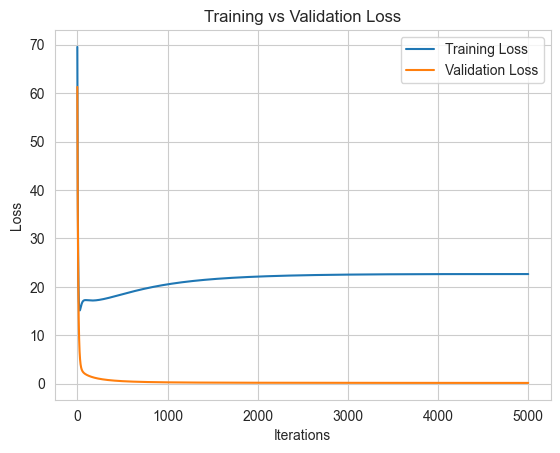

In [82]:
# Assuming you have your training data (X_train, y_train) and validation data (X_val, y_val)
final_model.fit(X, y, X_val=X_val, y_val=y_val)

plt.plot(final_model.training_loss, label='Training Loss')
plt.plot(final_model.validation_loss, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [103]:
X_test2 = preprocessor.transform(X_test)
predictions = final_model.predict(X_test2)
actual = np.exp(y_test)

In [91]:
r2_score(actual,predictions)

0.3584254826317722

In [110]:
X_train.head()

,experience_level,work_year,company_size,employee_residence,employment_type,salary_currency,company_location,job_title,remote_ratio
0,SE,2023,L,ES,FT,EUR,ES,Principal Data Scientist,100
1,MI,2023,S,US,CT,USD,US,ML Engineer,100
2,MI,2023,S,US,CT,USD,US,ML Engineer,100
3,SE,2023,M,CA,FT,USD,CA,Data Scientist,100
4,SE,2023,M,CA,FT,USD,CA,Data Scientist,100


In [112]:
final_model.predict(X_test2)[0]

160238.6479582446